In [1]:
import os
import sys
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from matplotlib import rc
import pandas as pd

In [3]:
#Reading the csv file with results
df = pd.read_csv('/AS_Neda/AS_thesis/validation_uncertainty.csv')

In [22]:
## Extracting correct and incorrect predictions
correct = df[df['Label'] == df['Prediction']]
incorrect = df[df['Label'] != df['Prediction']]

# 1- Entropy
# Correct Entropies for all classes
entropy_correct = correct['Entropy']
# InCorrect Entropies for all classes
entropy_incorrent = incorrect['Entropy']

# Normal Correct and inCorrect predictions
Normal_correct_Entropy = correct[correct['Label']==0]['Entropy']
Normal_incorrect_Entropy= incorrect[incorrect['Label']==0]['Entropy']

# Mild Correct and inCorrect predictions
Mild_correct_Entropy = correct[correct['Label']==1]['Entropy']
Mild_incorrect_Entropy= incorrect[incorrect['Label']==1]['Entropy']

# Moderate Correct and inCorrect predictions
Moderate_correct_Entropy=correct[correct['Label']==2]['Entropy']
Moderate_incorrect_Entropy= incorrect[incorrect['Label']==2]['Entropy']

# Severe Correct and inCorrect predictions
Severe_correct_Entropy=correct[correct['Label']==3]['Entropy']
Severe_incorrect_Entropy= incorrect[incorrect['Label']==3]['Entropy']


# 2- Density
# Correct Densities for all classes
density_correct = correct['Density']
# InCorrect Densities for all classes
density_incorrent = incorrect['Density']

# Normal Correct and inCorrect predictions
Normal_correct_Density = correct[correct['Label']==0]['Density']
Normal_incorrect_Density= incorrect[incorrect['Label']==0]['Density']

# Mild Correct and inCorrect predictions
Mild_correct_Density = correct[correct['Label']==1]['Density']
Mild_incorrect_Density= incorrect[incorrect['Label']==1]['Density']

# Moderate Correct and inCorrect predictions
Moderate_correct_Density= correct[correct['Label']==2]['Density']
Moderate_incorrect_Density= incorrect[incorrect['Label']==2]['Density']

# Severe Correct and inCorrect predictions
Severe_correct_Density= correct[correct['Label']==3]['Density']
Severe_incorrect_Density= incorrect[incorrect['Label']==3]['Density']


# Entropy Diagrams
## Overall Entropy 

Text(0.5, 1.0, 'Overall Entropy')

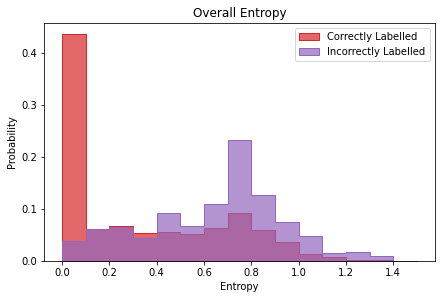

In [23]:
common_kwargs = dict(stat='probability', kde=False, bins=15, binrange=[0,1.5], legend=False, element="step", alpha=0.7)

#plots the histogram
fig, ax = plt.subplots(figsize=(7,7/1.6))
fig.subplots_adjust(hspace=0.30)  # adjust space between axes

correct = sb.histplot(data=entropy_correct, color=sb.color_palette()[3], 
            **common_kwargs, ax=ax, label = 'Correctly Labelled')
incorrect = sb.histplot(data=entropy_incorrent, color=sb.color_palette()[4],
            **common_kwargs, ax=ax, label = 'Incorrectly Labelled')
ax.legend()
ax.set_title('Overall Entropy')

## Normal

Text(0.5, 1.0, 'Overall Entropy')

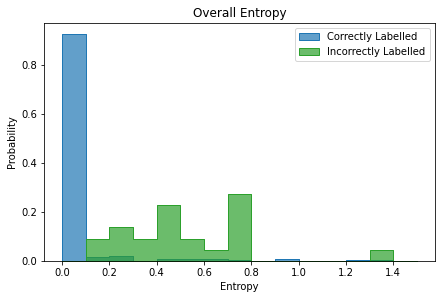

In [24]:
common_kwargs = dict(stat='probability', kde=False, bins=15, binrange=[0,1.5], legend=False, element="step", alpha=0.7)

#plots the histogram
fig, ax = plt.subplots(figsize=(7,7/1.6))
fig.subplots_adjust(hspace=0.30)  # adjust space between axes

correct = sb.histplot(data=Normal_correct_Entropy, color=sb.color_palette()[0], 
            **common_kwargs, ax=ax, label = 'Correctly Labelled')
incorrect = sb.histplot(data=Normal_incorrect_Entropy, color=sb.color_palette()[2],
            **common_kwargs, ax=ax, label = 'Incorrectly Labelled')
ax.legend()
ax.set_title('Overall Entropy')

## Mild

Text(0.5, 1.0, 'Overall Entropy')

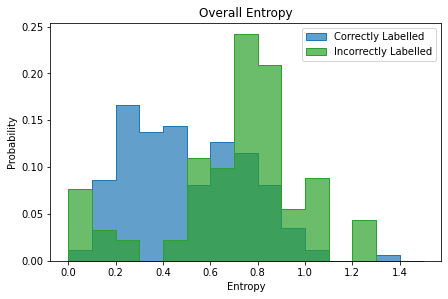

In [25]:
common_kwargs = dict(stat='probability', kde=False, bins=15, binrange=[0,1.5], legend=False, element="step", alpha=0.7)

#plots the histogram
fig, ax = plt.subplots(figsize=(7,7/1.6))
fig.subplots_adjust(hspace=0.30)  # adjust space between axes

correct = sb.histplot(data=Mild_correct_Entropy, color=sb.color_palette()[0], 
            **common_kwargs, ax=ax, label = 'Correctly Labelled')
incorrect = sb.histplot(data=Mild_incorrect_Entropy, color=sb.color_palette()[2],
            **common_kwargs, ax=ax, label = 'Incorrectly Labelled')
ax.legend()
ax.set_title('Overall Entropy')

## Moderate

Text(0.5, 1.0, 'Overall Entropy')

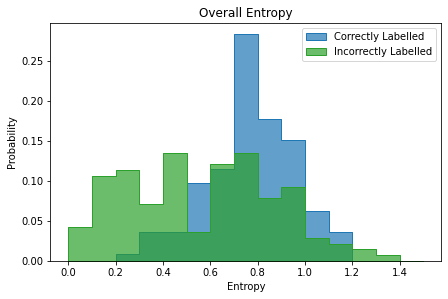

In [26]:
common_kwargs = dict(stat='probability', kde=False, bins=15, binrange=[0,1.5], legend=False, element="step", alpha=0.7)

#plots the histogram
fig, ax = plt.subplots(figsize=(7,7/1.6))
fig.subplots_adjust(hspace=0.30)  # adjust space between axes

correct = sb.histplot(data=Moderate_correct_Entropy, color=sb.color_palette()[0], 
            **common_kwargs, ax=ax, label = 'Correctly Labelled')
incorrect = sb.histplot(data=Moderate_incorrect_Entropy, color=sb.color_palette()[2],
            **common_kwargs, ax=ax, label = 'Incorrectly Labelled')
ax.legend()
ax.set_title('Overall Entropy')

## Severe

Text(0.5, 1.0, 'Overall Entropy')

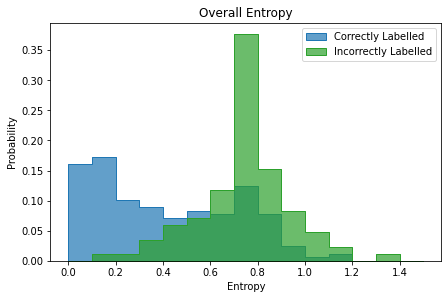

In [27]:
common_kwargs = dict(stat='probability', kde=False, bins=15, binrange=[0,1.5], legend=False, element="step", alpha=0.7)

#plots the histogram
fig, ax = plt.subplots(figsize=(7,7/1.6))
fig.subplots_adjust(hspace=0.30)  # adjust space between axes

correct = sb.histplot(data=Severe_correct_Entropy, color=sb.color_palette()[0], 
            **common_kwargs, ax=ax, label = 'Correctly Labelled')
incorrect = sb.histplot(data=Severe_incorrect_Entropy, color=sb.color_palette()[2],
            **common_kwargs, ax=ax, label = 'Incorrectly Labelled')
ax.legend()
ax.set_title('Overall Entropy')

# Density Diagrams
## Overall Density

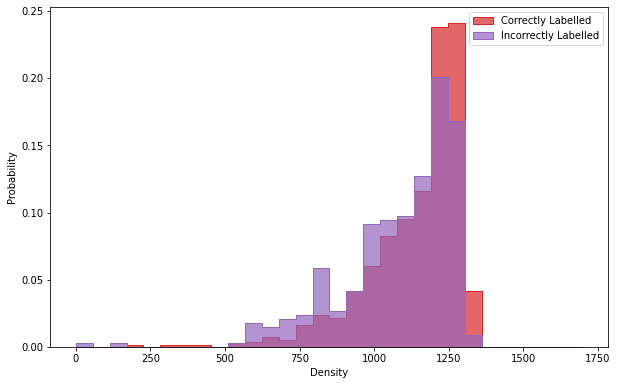

In [33]:
common_kwargs = dict(stat='probability', kde=False, bins=30, binrange=[0,1700], legend=False, element="step", alpha=0.7)
separate_ID = False
id_kwargs = dict(
          hue="category", multiple="stack", 
          palette=[sb.color_palette()[0], sb.color_palette()[4]]) if separate_ID else dict(color=sb.color_palette()[3]) 

#plots the histogram
fig, ax = plt.subplots(figsize=(10,10/1.6))
fig.subplots_adjust(hspace=0.30)  # adjust space between axes

correct = sb.histplot(data=density_correct, **id_kwargs,
            **common_kwargs, ax=ax, label = 'Correctly Labelled')
incorrect = sb.histplot(data=density_incorrent, color=sb.color_palette()[4],
            **common_kwargs, ax=ax, label = 'Incorrectly Labelled')
ax.legend()

## Normal

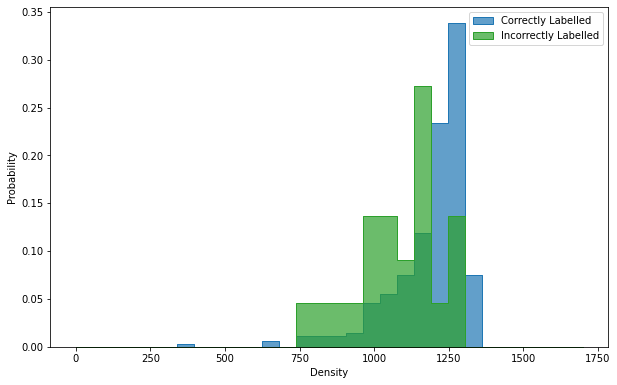

In [39]:
common_kwargs = dict(stat='probability', kde=False, bins=30, binrange=[0,1700], legend=False, element="step", alpha=0.7)
separate_ID = False
id_kwargs = dict(
          hue="category", multiple="stack", 
          palette=[sb.color_palette()[0], sb.color_palette()[4]]) if separate_ID else dict(color=sb.color_palette()[0]) 

#plots the histogram
fig, ax = plt.subplots(figsize=(10,10/1.6))
fig.subplots_adjust(hspace=0.30)  # adjust space between axes

correct = sb.histplot(data=Normal_correct_Density, **id_kwargs,
            **common_kwargs, ax=ax, label = 'Correctly Labelled')
incorrect = sb.histplot(data=Normal_incorrect_Density, color=sb.color_palette()[2],
            **common_kwargs, ax=ax, label = 'Incorrectly Labelled')
ax.legend()

## Mild

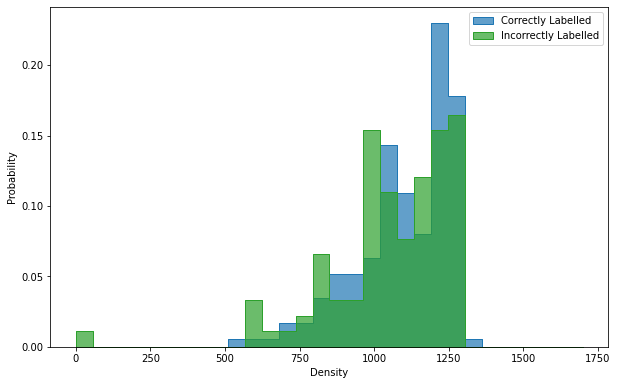

In [40]:
common_kwargs = dict(stat='probability', kde=False, bins=30, binrange=[0,1700], legend=False, element="step", alpha=0.7)
separate_ID = False
id_kwargs = dict(
          hue="category", multiple="stack", 
          palette=[sb.color_palette()[0], sb.color_palette()[4]]) if separate_ID else dict(color=sb.color_palette()[0]) 

#plots the histogram
fig, ax = plt.subplots(figsize=(10,10/1.6))
fig.subplots_adjust(hspace=0.30)  # adjust space between axes

correct = sb.histplot(data=Mild_correct_Density, **id_kwargs,
            **common_kwargs, ax=ax, label = 'Correctly Labelled')
incorrect = sb.histplot(data=Mild_incorrect_Density, color=sb.color_palette()[2],
            **common_kwargs, ax=ax, label = 'Incorrectly Labelled')
ax.legend()

## Moderate

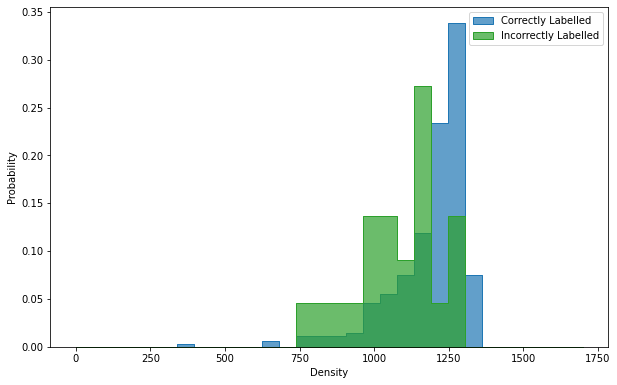

In [41]:
common_kwargs = dict(stat='probability', kde=False, bins=30, binrange=[0,1700], legend=False, element="step", alpha=0.7)
separate_ID = False
id_kwargs = dict(
          hue="category", multiple="stack", 
          palette=[sb.color_palette()[0], sb.color_palette()[4]]) if separate_ID else dict(color=sb.color_palette()[0]) 

#plots the histogram
fig, ax = plt.subplots(figsize=(10,10/1.6))
fig.subplots_adjust(hspace=0.30)  # adjust space between axes

correct = sb.histplot(data=Normal_correct_Density, **id_kwargs,
            **common_kwargs, ax=ax, label = 'Correctly Labelled')
incorrect = sb.histplot(data=Normal_incorrect_Density, color=sb.color_palette()[2],
            **common_kwargs, ax=ax, label = 'Incorrectly Labelled')
ax.legend()

## Severe

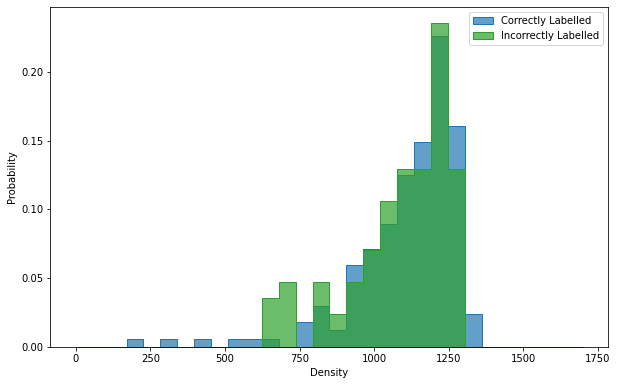

In [42]:
common_kwargs = dict(stat='probability', kde=False, bins=30, binrange=[0,1700], legend=False, element="step", alpha=0.7)
separate_ID = False
id_kwargs = dict(
          hue="category", multiple="stack", 
          palette=[sb.color_palette()[0], sb.color_palette()[4]]) if separate_ID else dict(color=sb.color_palette()[0]) 

#plots the histogram
fig, ax = plt.subplots(figsize=(10,10/1.6))
fig.subplots_adjust(hspace=0.30)  # adjust space between axes

correct = sb.histplot(data=Severe_correct_Density, **id_kwargs,
            **common_kwargs, ax=ax, label = 'Correctly Labelled')
incorrect = sb.histplot(data=Severe_incorrect_Density, color=sb.color_palette()[2],
            **common_kwargs, ax=ax, label = 'Incorrectly Labelled')
ax.legend()